# Plotting difference between 2000s and 1970s (10-year averages)
- Select multiple versions
- generate multi-panel plot

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import joblib

In [29]:
# Define which versions to plot
ver = ['1.1.3.1.1.1',
       '1.2.3.1.1.1',
       '2.1.3.1.1.1',
       '2.2.3.1.1.1']
note=['ship & RF','ship+Argo & RF','ship & NN','ship+Argo & NN']

In [5]:
diro='/glade/campaign/univ/ugit0034/ML4O2_results/O2map_v'

In [16]:
ds=xr.open_dataset(diro+ver[0]+'.nc')
#ds.dims

Frozen({'time': 552, 'depth': 20, 'lat': 180, 'lon': 360})

In [33]:
do2 = np.zeros((4,ds.dims['depth'],ds.dims['lat'],ds.dims['lon']))
#
for n,v in enumerate(ver):
    ds=xr.open_dataset(diro+v+'.nc')
    # contrast 70s vs 2000s
    delo2 = ds.o2est.sel(time=slice('2010-01','2020-01')).mean('time') \
            - ds.o2est.sel(time=slice('1970-01','1980-01')).mean('time')
    do2[n,:,:,:]=delo2.to_numpy()

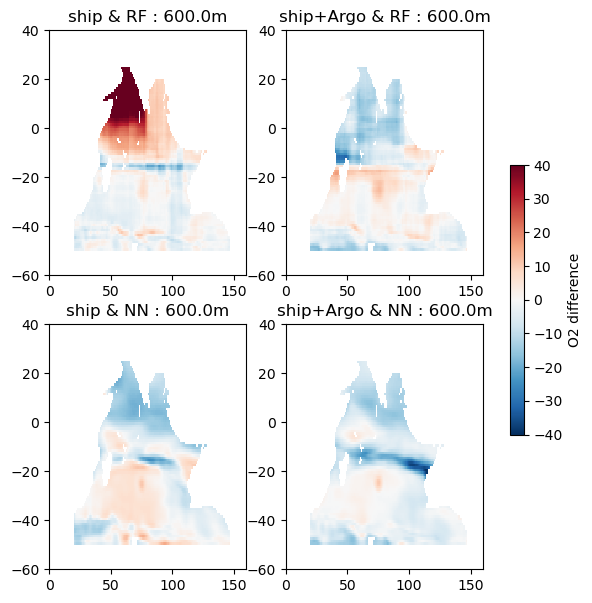

In [36]:
# select depth level
K = 15
z = ds.depth[K].to_numpy()
fig=plt.figure(figsize=(7,7))
ax=fig.subplots(2,2)
lon=ds.lon
lat=ds.lat
ax1=ax.flatten()
for n in range(4):
    im=ax1[n].pcolormesh(lon,lat,do2[n,K,:,:],cmap='RdBu_r',vmin=-40,vmax=40)
    ax1[n].set_xlim(0,160)
    ax1[n].set_ylim(-60,40)
    ax1[n].set_title(note[n]+' : '+str(z)+'m')
plt.colorbar(im,ax=ax1[:],location='right',shrink=.5,label='O2 difference')
#plt.savefig('difference_plot.pdf',bbox_inches='tight')